In [17]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [18]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [20]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
# Define CNN Model
model = Sequential()

In [22]:
# Add Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [23]:
# Flatten the output
model.add(Flatten())

In [24]:
# Add Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(10, activation='softmax'))

In [25]:
# Print model summary to get details of each layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 128)        

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 26s 32ms/step - loss: 1.7133 - accuracy: 0.3665 - val_loss: 1.3595 - val_accuracy: 0.5059
Epoch 2/10
782/782 [==============================] - 26s 33ms/step - loss: 1.3488 - accuracy: 0.5148 - val_loss: 1.1585 - val_accuracy: 0.5911
Epoch 3/10
782/782 [==============================] - 24s 31ms/step - loss: 1.1828 - accuracy: 0.5826 - val_loss: 1.0893 - val_accuracy: 0.6129
Epoch 4/10
782/782 [==============================] - 23s 29ms/step - loss: 1.0559 - accuracy: 0.6299 - val_loss: 0.9652 - val_accuracy: 0.6592
Epoch 5/10
782/782 [==============================] - 24s 30ms/step - loss: 0.9619 - accuracy: 0.6653 - val_loss: 0.9574 - val_accuracy: 0.6625
Epoch 6/10
782/782 [==============================] - 24s 31ms/step - loss: 0.8923 - accuracy: 0.6899 - val_loss: 0.8973 - val_accuracy: 0.6923
Epoch 7/10
782/782 [==============================] - 24s 31ms/step - loss: 0.8358 - accuracy: 0.7098 - val_loss: 0.8675 - val_accuracy:

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.8147 - accuracy: 0.7213
Test Accuracy: 0.7213


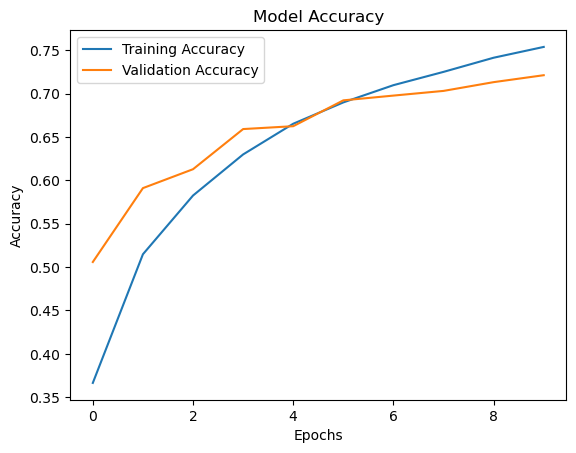

In [29]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [30]:
# Make predictions
predictions = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [31]:
# Display some test images with predictions
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

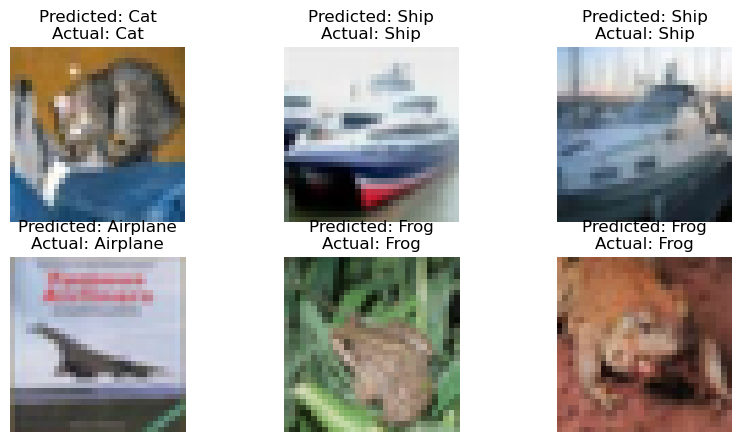

In [32]:
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Predicted: {class_names[predictions[i].argmax()]}\nActual: {class_names[y_test[i].argmax()]}')
    plt.axis('off')
plt.show()

In [33]:
from sklearn.metrics import classification_report
import numpy as np
# Get predicted class labels
y_pred_classes = np.argmax(predictions, axis=1)

# Get actual class labels
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    Airplane       0.75      0.76      0.75      1000
  Automobile       0.81      0.88      0.84      1000
        Bird       0.63      0.61      0.62      1000
         Cat       0.59      0.47      0.53      1000
        Deer       0.71      0.66      0.68      1000
         Dog       0.66      0.59      0.63      1000
        Frog       0.66      0.87      0.75      1000
       Horse       0.74      0.76      0.75      1000
        Ship       0.83      0.81      0.82      1000
       Truck       0.82      0.79      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

